In [15]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets
from tensorflow.keras.layers import Conv2D,BatchNormalization,Activation,MaxPool2D,Dropout,Flatten,Dense
from tensorflow.keras import Sequential,layers,optimizers,losses
from matplotlib import pyplot as plt
import numpy as np
import os
(x,y),(x_test,y_test) = datasets.mnist.load_data()#load mnist dataset
x=np.expand_dims(x, axis=3)
x_test=np.expand_dims(x_test, axis=3)
print('x:',x.shape,'y:',y.shape,'x_test:',x_test.shape,'y_test:',y_test.shape)#the dataset shape

x: (60000, 28, 28, 1) y: (60000,) x_test: (10000, 28, 28, 1) y_test: (10000,)


 # MNIST figure,the four figures in the MNIST dataset 

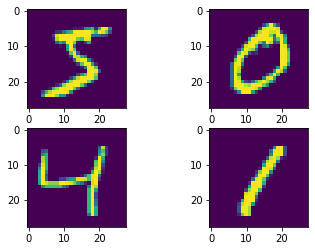

In [16]:
plt.gcf
for i in range(4):
    img=np.array(x[i])
    plt.subplot(2,2,i+1)
    plt.imshow(img)
plt.show()

# data preparation

In [17]:
def convert_onehot(index,len):
    onehot=np.zeros((len,))
    onehot[index]=1
    return onehot
convert_onehot(y[0],10)    #convert label to onehot

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [18]:
def convert_label(indice):
    temp=[]
    for i in range(len(indice)):
        temp.append(convert_onehot(indice[i],10))
    return temp
#labels to onehot vector

In [19]:
def preprocess(x,y):
    x=tf.cast(x,dtype=tf.float32)/255.    #normalazation
    #x=tf.reshape(x,[-1,28*28])            #flatten
    y=tf.cast(y,dtype=tf.int32)
    y=tf.one_hot(y,depth=10)
    return x,y

In [20]:
xy_dataset=tf.data.Dataset.from_tensor_slices((x,y)) #make dataset object
xy_dataset=xy_dataset.shuffle(len(y))  #random
xy_dataset=xy_dataset.batch(128)       #mini batch
xy_dataset=xy_dataset.map(preprocess)
print(xy_dataset)

<MapDataset shapes: ((None, 28, 28, 1), (None, 10)), types: (tf.float32, tf.float32)>


# model building

In [21]:
network = Sequential([
    layers.Conv2D(6,kernel_size=3,strides=1,padding='SAME'), #convolutional layer:6kernal3*3,pad with same
    layers.MaxPooling2D(pool_size=2,strides=2), # max pooling layer sizeto1/2
    layers.ReLU(), # activation function;relu
    layers.Conv2D(16,kernel_size=3,strides=1,padding='SAME'), # convolutional layer:16kernal3*3
    layers.MaxPooling2D(pool_size=2,strides=2,padding='SAME'), # same as last
    layers.ReLU(), # activation function:relu
    layers.Flatten(), # flat to 1 dimension
    layers.Dense(120, activation='relu'), # fully connected layer,120 nodes
    layers.Dense(10) 
                ])

In [22]:
#network.add(layers.Dropout(0.2))  #dropout mean
network.build(input_shape=(4, 28,28,1))
network.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (4, 28, 28, 6)            60        
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (4, 14, 14, 6)            0         
_________________________________________________________________
re_lu_4 (ReLU)               (4, 14, 14, 6)            0         
_________________________________________________________________
conv2d_5 (Conv2D)            (4, 14, 14, 16)           880       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (4, 7, 7, 16)             0         
_________________________________________________________________
re_lu_5 (ReLU)               (4, 7, 7, 16)             0         
_________________________________________________________________
flatten_2 (Flatten)          (4, 784)                 

In [28]:
network.compile(optimizer= optimizers.Adam(lr=0.01),
               loss=losses.CategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])
history=network.fit(xy_dataset,epochs=30)
history.history

Epoch 1/30
469/469 [==============================] - 11s 23ms/step - loss: 0.0295 - accuracy: 0.9944
Epoch 2/30
469/469 [==============================] - 12s 25ms/step - loss: 0.0207 - accuracy: 0.9957
Epoch 3/30
469/469 [==============================] - 12s 25ms/step - loss: 0.0275 - accuracy: 0.9939
Epoch 4/30
469/469 [==============================] - 12s 25ms/step - loss: 0.0244 - accuracy: 0.9954
Epoch 5/30
469/469 [==============================] - 12s 25ms/step - loss: 0.0179 - accuracy: 0.9965
Epoch 6/30
469/469 [==============================] - 12s 25ms/step - loss: 0.0340 - accuracy: 0.9942
Epoch 7/30
469/469 [==============================] - 12s 25ms/step - loss: 0.0213 - accuracy: 0.9957
Epoch 8/30
469/469 [==============================] - 12s 26ms/step - loss: 0.0269 - accuracy: 0.9951
Epoch 9/30
469/469 [==============================] - 12s 26ms/step - loss: 0.0442 - accuracy: 0.9933
Epoch 10/30
469/469 [==============================] - 12s 26ms/step - loss: 0.025

{'loss': [0.02947446145117283,
  0.020715557038784027,
  0.027490444481372833,
  0.02443266473710537,
  0.01793132722377777,
  0.03401118144392967,
  0.02133498154580593,
  0.026896080002188683,
  0.04419288784265518,
  0.025948984548449516,
  0.02395780012011528,
  0.01844995655119419,
  0.03187170252203941,
  0.025690505281090736,
  0.023525068536400795,
  0.038094259798526764,
  0.03278046473860741,
  0.02685050293803215,
  0.030396293848752975,
  0.03489827364683151,
  0.01759607344865799,
  0.03207183629274368,
  0.04032684490084648,
  0.03040616400539875,
  0.03161895275115967,
  0.04102635756134987,
  0.021912500262260437,
  0.03220123052597046,
  0.031125307083129883,
  0.034547802060842514],
 'accuracy': [0.9944166541099548,
  0.9957000017166138,
  0.9939333200454712,
  0.9954333305358887,
  0.9965333342552185,
  0.994183361530304,
  0.9957000017166138,
  0.9950833320617676,
  0.9933000206947327,
  0.9957666397094727,
  0.9958000183105469,
  0.9968166947364807,
  0.99481666088

# test

In [29]:
test_dataset=tf.data.Dataset.from_tensor_slices((x_test,y_test))
test_dataset=test_dataset.batch(128)
test_dataset=test_dataset.map(preprocess)
out=network.predict(x_test)
print(x_test.shape)
print(out.shape)

(10000, 28, 28, 1)
(10000, 10)


In [30]:
network.evaluate(test_dataset)

79/79 [==============================] - 1s 9ms/step - loss: 0.3522 - accuracy: 0.9854


[0.3522242605686188, 0.9854000210762024]

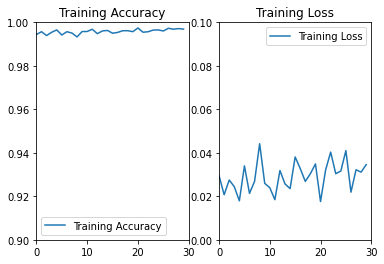

In [31]:
acc = history.history['accuracy']
loss = history.history['loss']

plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.title('Training Accuracy')
plt.axis([0,30,0.9,1])
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.title('Training Loss')
plt.axis([0,30,0,0.1])
plt.legend()
plt.show()